In [ ]:
import nltk

## 텍스트 마이닝 
* 자연어로 구성된 "비정형 데이터"에서 패턴 또는 관계를 추출하여 의미 있는 정보를 찾아내는 기법들을 의미
* 트위터, 페이스북, 블로그, 웹게시판, 온라인 뉴스등 웹 상에 존재하는 방대한 비정형 데이터를 실시간으로 수집/분석하여 
* 고객의 감성 및 의도등을 알아내는 과정을 의미
    + 자연어 처리(Natural Language Processing)와 텍스트 분석(Text Analytics)등이 핵심 분야

## 텍스트 마이닝 활용분야 
* 텍스트분류 : 문서가 특정 분류/카테고리에 속하는 것을 예측
* 감성분석 : 텍스트에 나타나는 감정/판단/믿음/의견등 주관적인 요소를 분석
* 텍스트요약 : 텍스트 내에서 중요한 주제나 중심사상을 추출
* 텍스트군집화 : 비슷한 유형의 문서에 대해 군집화를 수행

## 텍스트 분석 수행 과정
* 텍스트 사전준비/전처리 
    + 대/소문자변경, 문장/숫자/특수문자 삭제, 토큰화, 불용어 제거, 어근추출
* 특성 벡터화/추출 
    + 가공된 텍스트에서 특성 추출후 여기에 벡터값을 지정, BOW, Word2Vec등을 사용
* 머신러닝모델 학습/예측/평가 : 
    + 감성분석/연관성분석

## 파이썬 기반 텍스트 분석 패키지
* NLTK, KoNLPy : 영어권/한국어 형태소 분석기
* Gensim : 텍스트요약(토픽모델링)에 두각을 나타냄, word2vec 기능도 구현되어 있음
* SpaCy : 최근 주목받는 NLP 패키지
* NLTK : 교육용으로 개발된 자연어 처리 및 분석용 파이썬 패키지, 다양한 예제를 포함하고 있음
    + www.nltk.org
    + pip install nltk

In [1]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ------------------------------------- 267.8/267.8 kB 16.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### English NLP

In [2]:
import nltk

In [3]:
# nltk 내장 영어 말뭉치corpus
nltk.download('book', quiet=True)

True

In [4]:
from nltk.book import *
# text1 부터 text9 까지 다양한 텍스트가 제공
# sents1 부터 sents9 까지 다양한 문장이 제공

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
len(text1)

260819

In [11]:
text1[:50]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and']

In [5]:
# 저작권이 말소된 문학작품을 포함하는
# 구텐베르그 말뭉치를 확인
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
# '햄릿'을 불러서 출력해봄
doc = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(doc[:300])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon 


## 텍스트 토큰화
* 문장 토큰화 : 문서에서 문장을 분리
* 단어 토큰화 : 문장에서 단어를 분리

In [15]:
# 행태소 분석을 위한 패키지 적재
from nltk import sent_tokenize
from nltk import word_tokenize

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\LG
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

In [22]:
# 문장토큰화 : sent_tokenize
# 문장토큰화 결과는 리스트로 생성
sents = sent_tokenize(text_sample)
sents

['The Matrix is everywhere its all around us, here even in this room.',
 'You can see it out your window or on your television.',
 'You feel it when you go to work, or go to church or pay your taxes.']

In [23]:
# 단어토큰화 : word_tokenize
# 단어토큰화 결과는 리스트로 생성
words = word_tokenize(sents[0])
words

['The',
 'Matrix',
 'is',
 'everywhere',
 'its',
 'all',
 'around',
 'us',
 ',',
 'here',
 'even',
 'in',
 'this',
 'room',
 '.']

## 불용어stopword 제거
* 분석상 큰 의미가 없는 단어를 지칭
* NLTK상에서는 stopwords 형태로 제공됨, 단 단어수는 적음

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\LG
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
nltk.corpus.stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
# 불용어를 이용한 단어토큰화 실시
stopwords = nltk.corpus.stopwords.words('english')

In [34]:
import re

re.sub('[^a-zA-z]','',words[8])  # 영문자가 아닌 문자를 제거

''

In [36]:
# 불용어 리스트와 토큰화된 단어들을 비교해서 불용어들을 걸러냄
tokens = []

for w in words:
    w = re.sub('[^a-zA-z]','',w.lower()) # 숫자, 문장부호 제거
    if w.lower() not in stopwords:  # 소문자로 변환후 불용어인지  확인
        if w != '': tokens.append(w)

tokens

['matrix', 'everywhere', 'around', 'us', 'even', 'room']

## 트럼프 연설문에 대한 단어 토큰화

In [129]:
import requests

url = 'https://raw.githubusercontent.com/siestageek/datasets/master/txt/thrump.txt'

res = requests.get(url)
docs = res.text

In [130]:
# 문장분리
sents = sent_tokenize(docs)
sents[0]

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of the people of the United States of America.'

In [131]:
words = []

for s in range(len(sents)):
    word = word_tokenize(sents[s])
    words.append(word)
words[0][0]

'Assembly'

In [132]:
# 문장에서 불용어 처리 후 단어 분리
tokens = []

for w in words:
    for i in range(len(w)):
        w[i] = re.sub('[^a-zA-z]','',w[i].lower()) # 숫자, 문장부호 제거
        if w[i].lower() not in stopwords:  # 소문자로 변환후 불용어인지  확인
            if w[i] != '': tokens.append(w[i])

tokens[:50]

['assembly',
 'speaker',
 'chung',
 'distinguished',
 'members',
 'assembly',
 'ladies',
 'gentlemen',
 'thank',
 'extraordinary',
 'privilege',
 'speak',
 'great',
 'chamber',
 'address',
 'people',
 'behalf',
 'people',
 'united',
 'states',
 'america',
 'short',
 'time',
 'country',
 'melania',
 'awed',
 'ancient',
 'modern',
 'wonders',
 'deeply',
 'moved',
 'warmth',
 'welcome',
 'last',
 'night',
 'president',
 'mrs',
 'moon',
 'showed',
 'us',
 'incredible',
 'hospitality',
 'beautiful',
 'reception',
 'blue',
 'house',
 'productive',
 'discussions',
 'increasing',
 'military']

### 강사님

In [85]:
sents = sent_tokenize(docs)
sents[0]

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of the people of the United States of America.'

In [86]:
words = []

for s in sents:
    s = re.sub('[^a-zA-z]',' ',s)
    words.append(word_tokenize(s))

In [137]:
# 문장에서 불용어 처리 후 단어 분리
tokens1 = []

for wds in words:
    filter_words = []
    for w in wds:
        w = w.lower()
        if w not in stopwords:  # 소문자로 변환후 불용어인지  확인
               filter_words.append(w)
            
    tokens1.append(filter_words)

tokens1[0]

['assembly',
 'speaker',
 'chung',
 '',
 'distinguished',
 'members',
 'assembly',
 '',
 'ladies',
 'gentlemen',
 '',
 'thank',
 'extraordinary',
 'privilege',
 'speak',
 'great',
 'chamber',
 'address',
 'people',
 'behalf',
 'people',
 'united',
 'states',
 'america',
 '']

## 스티브잡스 스탠포드대 졸업 축사문에 대한 단어 토큰화

In [190]:
url = 'https://raw.githubusercontent.com/siestageek/datasets/master/txt/stevejobs_en.txt'

res = requests.get(url)
docs2 = res.text

In [93]:
sents2 = sent_tokenize(docs2)
sents[0]

'I am honored to be with you today at your commencement from one of the finest universities in the world.'

In [96]:
words2 = []

for s in sents2:
    s = re.sub('[^a-zA-z]',' ',s)
    words2.append(word_tokenize(s))

In [97]:
# 문장에서 불용어 처리 후 단어 분리
tokens2 = []

for wds in words2:
    filter_words = []
    for w in wds:
        w = w.lower()
        if w not in stopwords:  # 소문자로 변환후 불용어인지  확인
               filter_words.append(w)
            
    tokens2.append(filter_words)

tokens2[0]

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world']

## 형태소 분석
* 형태소는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 의미
* 주어진 단어 또는 어절을 구성하는 각 형태소를 분리한 후 
* 분리된 형태소의 기본형 및 품사 정보를 추출하는 것을 형태소 분석이라 함
* 문장 > 어절 > 단어 > 어근/접두사/접미사 > 품사
* 필요에 따라 어근 추출 또는 원형 복원을 하기도 함

## 품사 태깅POS tagging
* 단어를 문법적 기능이나 형태, 의미에 따라 구분한 것
* NLTK에서는 Penn Treebank Tagset을 이용해서 품사태깅을 함
     + NNP고유명사, VB동사, VBP현재진행형 동사, TO전치사, NN명사, DT관형사, ADJ형용사

In [98]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LG PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [101]:
from nltk.tag import pos_tag

In [100]:
text = 'You feel it when you go to work, or go to church or pay your taxes.'

text = re.sub('[^a-zA-Z]',' ',text)  # 특수기호,숫자 제거
words = word_tokenize(text)

tokens = []
for w in words:                      # 불용어 제거
    w = w.lower()
    if w not in stopwords:    
        tokens.append(w)

print(words)
print(tokens)

['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes']
['feel', 'go', 'work', 'go', 'church', 'pay', 'taxes']


In [102]:
# 품사태깅 : pos_tag
tags = pos_tag(tokens)
tags

[('feel', 'NN'),
 ('go', 'VB'),
 ('work', 'NN'),
 ('go', 'VBP'),
 ('church', 'JJ'),
 ('pay', 'NN'),
 ('taxes', 'NNS')]

### 문서에서 명사만 추출하기

In [104]:
NN = [w[0] for w in tags if w[1] == 'NN']
NN

['feel', 'work', 'pay']

In [109]:
# 매트릭스 대사에서 명사만 추출하기
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

text_sample = re.sub('[^a-zA-Z]',' ',text_sample)  # 특수기호,숫자 제거
words = word_tokenize(text_sample)

tokens = []
for w in words:                      # 불용어 제거
    w = w.lower()
    if w not in stopwords:    
        tokens.append(w)

print(words)
print(tokens)

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', 'here', 'even', 'in', 'this', 'room', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes']
['matrix', 'everywhere', 'around', 'us', 'even', 'room', 'see', 'window', 'television', 'feel', 'go', 'work', 'go', 'church', 'pay', 'taxes']


In [110]:
# 품사태깅 : pos_tag
tags = pos_tag(tokens)
tags

[('matrix', 'NN'),
 ('everywhere', 'RB'),
 ('around', 'IN'),
 ('us', 'PRP'),
 ('even', 'RB'),
 ('room', 'NN'),
 ('see', 'NN'),
 ('window', 'JJ'),
 ('television', 'NN'),
 ('feel', 'NN'),
 ('go', 'VBP'),
 ('work', 'NN'),
 ('go', 'VBP'),
 ('church', 'JJ'),
 ('pay', 'NN'),
 ('taxes', 'NNS')]

In [111]:
NN = [w[0] for w in tags if w[1] == 'NN']
NN

['matrix', 'room', 'see', 'television', 'feel', 'work', 'pay']

### 강사님

In [122]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

In [123]:
# 매트릭스 대사에서 명사만 추출하기
words = []

sents = sent_tokenize(text_sample)
for s in sents:
    s = re.sub('[^a-zA-Z]',' ', s)
    words.append(word_tokenize(s))
    
tokens0 = []
for wds in words:                      # 불용어 제거
    fw = []
    for w in wds:
        w = w.lower()
        if w not in stopwords:    
            fw.append(w)
    tokens0.append(fw)        
        
tokens0

[['matrix', 'everywhere', 'around', 'us', 'even', 'room'],
 ['see', 'window', 'television'],
 ['feel', 'go', 'work', 'go', 'church', 'pay', 'taxes']]

In [141]:
# 품사태깅 : pos_tag
tags0 = []
for tk in tokens0:
    tags = pos_tag(tk)
    NN = [tg[0] for tg in tags if tg[1] == 'NN']
    tags0.append(NN)

tags0[:10]

[['matrix', 'room'], ['television'], ['feel', 'work', 'pay']]

## 트럼프 연설문에서 명사만 추출하기

In [157]:
import requests

url = 'https://raw.githubusercontent.com/siestageek/datasets/master/txt/thrump.txt'

res = requests.get(url)
docs = res.text

In [158]:
docs = re.sub('[^a-zA-Z]',' ',docs)  # 특수기호,숫자 제거
words = word_tokenize(docs)

tokens = []
for w in words:                      # 불용어 제거
    w = w.lower()
    if w not in stopwords:    
        tokens.append(w)

In [159]:
# 품사태깅 : pos_tag
tags = pos_tag(tokens)
tags[:10]

[('assembly', 'RB'),
 ('speaker', 'NN'),
 ('chung', 'NN'),
 ('distinguished', 'VBD'),
 ('members', 'NNS'),
 ('assembly', 'RB'),
 ('ladies', 'NNS'),
 ('gentlemen', 'NNS'),
 ('thank', 'VBD'),
 ('extraordinary', 'JJ')]

In [161]:
NN = [w[0] for w in tags if w[1] == 'NN']
NN[:10]

['speaker',
 'chung',
 'privilege',
 'speak',
 'chamber',
 'time',
 'country',
 'melania',
 'night',
 'president']

### 강사님

In [139]:
nouns1 = []
for tk in tokens1:
    tags = pos_tag(tk)
    NN = [tg[0] for tg in tags if tg[1] == 'NN']
    nouns1.append(NN)

nouns1[:3]

[['speaker', 'chung', 'privilege', 'speak', 'chamber', ''],
 ['time', 'country', 'melania', ''],
 ['night', 'president', 'mrs', '']]

## 스티브잡스 스탠포드대 졸업 축사문에 대한 단어 토큰화

In [136]:
nouns2 = []
for tk in tokens2:
    tags = pos_tag(tk)
    NN = [tg[0] for tg in tags if tg[1] == 'NN']
    nouns2.append(NN)

nouns2[:3]

[['today', 'commencement', 'finest', 'world'],
 ['college'],
 ['truth', 'college', 'graduation']]

## 단어 빈도
* 텍스트 데이터의 대표단어를 알아볼수 있는 방법
* 단어별 빈도를 조사해서 알아낸 상위 n개 단어들을 대표단어로 지정

In [164]:
from nltk import FreqDist

# 각 단어별 빈도 출력
NN0 = []
for ns in tags0:    # 각 문장별로 추출된 명사를 하나로 합침
    for n in ns:
        NN0.append(n)

fdwords = FreqDist(NN0)
fdwords

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'pay': 1})

In [156]:
# FreqDist 좀 더 자세히 알아보기
print(fdwords.N())       # 전체 단어수
print(fdwords['room'])   # 특정 단어 빈도수
print(fdwords.most_common())   # 빈도가 높은 단어순으로 출력
print(fdwords.most_common(3))  # 빈도가 높은순으로 n개의 단어 출력

6
1
[('matrix', 1), ('room', 1), ('television', 1), ('feel', 1), ('work', 1), ('pay', 1)]
[('matrix', 1), ('room', 1), ('television', 1)]


## 트럼프 연설문에서 가장 많이 언급된 15개 단어

In [180]:
NN1 = []
for ns in nouns1:    # 각 문장별로 추출된 명사를 하나로 합침
    for n in ns:
        NN1.append(n)

fdwords1 = FreqDist(NN1)
fdwords1.most_common(15)

[('', 194),
 ('regime', 16),
 ('world', 13),
 ('korea', 12),
 ('today', 10),
 ('nation', 9),
 ('peninsula', 9),
 ('country', 8),
 ('time', 7),
 ('war', 7),
 ('city', 6),
 ('year', 6),
 ('line', 6),
 ('life', 6),
 ('day', 6)]

In [ ]:
# FreqDist 좀 더 자세히 알아보기
print(fdwords.N())       # 전체 단어수
print(fdwords['room'])   # 특정 단어 빈도수
# print(fdwords.most_common())   # 빈도가 높은 단어순으로 출력
print(fdwords.most_common(3))  # 빈도가 높은순으로 n개의 단어 출력

## 스티브잡스 스탠포드대 졸업 축사문에서 가장 많이 언급된 15개 단어

In [168]:
NN2 = []
for ns in nouns2:    # 각 문장별로 추출된 명사를 하나로 합침
    for n in ns:
        NN2.append(n)

fdwords2 = FreqDist(NN2)
fdwords2.most_common(15)

[('life', 17),
 ('college', 14),
 ('apple', 9),
 ('everything', 6),
 ('death', 6),
 ('way', 5),
 ('something', 5),
 ('company', 5),
 ('today', 4),
 ('course', 4),
 ('computer', 4),
 ('heart', 4),
 ('work', 4),
 ('stay', 4),
 ('world', 3)]

## 워드클라우드wordcloud
* 문서에 사용된 단어의 중요도나 인기도 등을 고려해서 
* 시각적으로 늘어 놓아 표시하는 시각화 유형을 의미
* 파이썬용 워드클라우드 패키지 
    + github.com/amueller/word_cloud
    + pip install wordcloud

In [170]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
### 트럼프 연설문 시각화

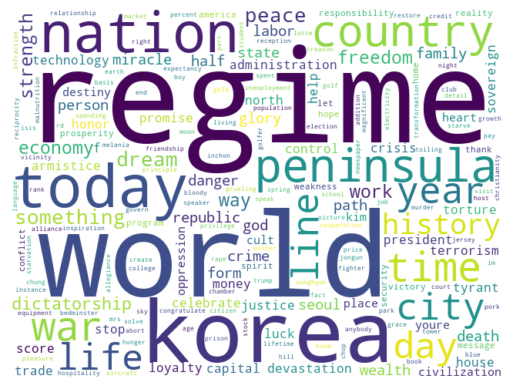

In [175]:
# generate_from_text : 텍스트 데이터로부터 빈도를 계산해 시각화
docs1 = ' '.join(NN1)   # 추출한 명사들을 빈칸으로 이어 붙여 하나의 문자열로 생성
wc = WordCloud(background_color='white',
              width=640,height=480).generate_from_text(docs1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

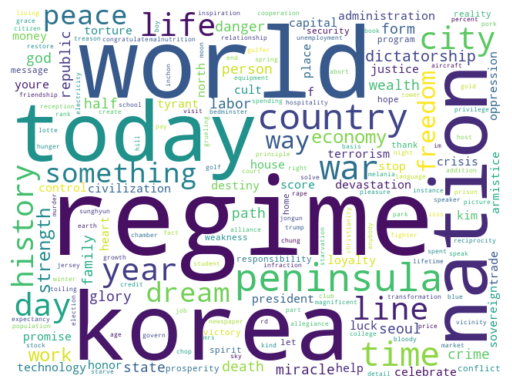

In [183]:
# generate_from_frequencies : 빈도가 dict형태로 처리된 데이터로 시각화
mc = dict(fdwords1.most_common())
wc = WordCloud(background_color='white',
              width=640,height=480).generate_from_frequencies(mc)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 스티브잡스 연설문 시각화

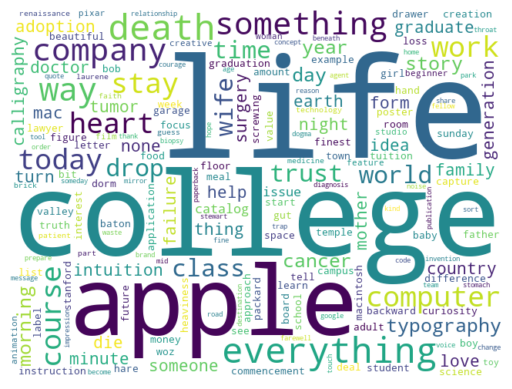

In [176]:
# generate_from_text : 텍스트 데이터로부터 빈도를 계산해 시각화
docs2 = ' '.join(NN2)   # 추출한 명사들을 빈칸으로 이어 붙여 하나의 문자열로 생성
wc = WordCloud(background_color='white',
              width=640,height=480).generate_from_text(docs2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

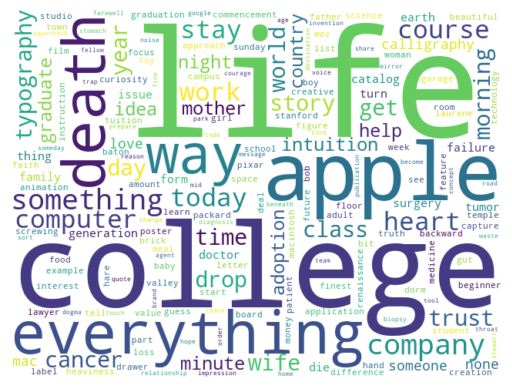

In [192]:
# generate_from_frequencies : 빈도가 dict형태로 처리된 데이터로 시각화
mc2 = dict(fdwords2.most_common())
wc = WordCloud(background_color='white',
              width=640,height=480).generate_from_frequencies(mc)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 마스크를 이용한 워드 클라우드

In [185]:
import numpy as np
from PIL import Image

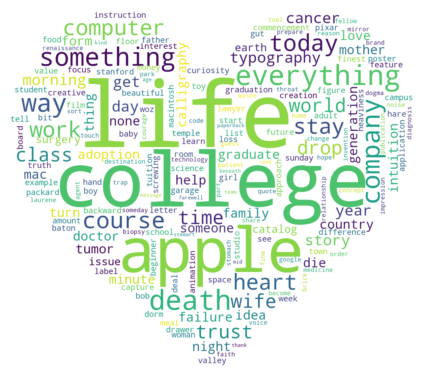

In [193]:
# mask
# stopwords
mask_path = 'img/h.jpg'       # 투명성 없는 파일
mask = np.array(Image.open(mask_path))   # 배경 이미지 파일을 numpy 배열로 변환

wcimg = WordCloud(background_color='white',
        mask=mask, stopwords=stopwords).generate_from_frequencies(mc2)
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()      